In [15]:
#################################################################################
# Непрерывная классификация. ВЫбрать датасет для классификации или              #
# распознавания образов (тоже можно интерпретировать как классификацию). Для    #
# этого датасета построить классификацию с помощью:                             #
# a) Метода опорных векторов                                                    #
# b) Метода k ближайших соседей. k подобрать экспериментально методом           #
#    "скользящего контроля".                                                    # 
# Сравнить качество получающихся классификаторов экспериментально (описать      #
# какими критериями пользовались).                                              #
#################################################################################

# Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from pandas import DataFrame

# Загружаем набор данных Ирисы
iris = datasets.load_iris()
iris_frame = DataFrame(iris.data)

# Делаем имена колонок такие же, как имена переменных
iris_frame.columns = iris.feature_names

# Добавляем столбец с целевой переменной
iris_frame['target'] = iris.target

# Для наглядности добавляем столбец с сортами
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

# Смотрим, что получилось
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


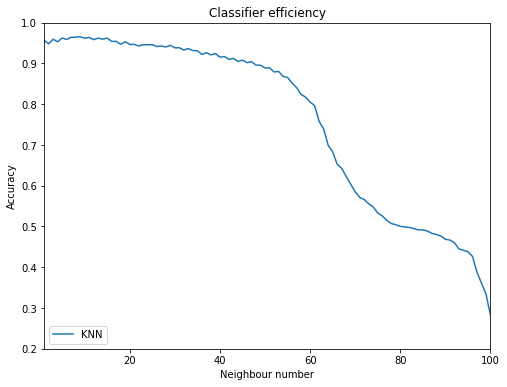

In [37]:
#################################################################################
# Непрерывная классификация. ВЫбрать датасет для классификации или              #
# распознавания образов (тоже можно интерпретировать как классификацию). Для    #
# этого датасета построить классификацию с помощью:                             #
# a) Метода опорных векторов                                                    #
# b) Метода k ближайших соседей. k подобрать экспериментально методом           #
#    "скользящего контроля".                                                    # 
# Сравнить качество получающихся классификаторов экспериментально (описать      #
# какими критериями пользовались).                                              #
#################################################################################

# Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Загружаем набор данных Ирисы
iris = datasets.load_iris()

# Количество блоков в методе k-fold кросс-валидация
splitsNum = 3
maxNeighbourNum = 100
maxRepeatNum = 20;

# Массивы точек для вывода информации на экран
coordX = []
coordY = []

# Перебираем возможное кол-во соседей
for neighbourNum in range(maxNeighbourNum):
    qSum1 = 0
    
    # Повторяем несколько раз для фикс. кол-ва соседей и усредняем
    for index in range(maxRepeatNum):
        # Подготовка кросс валидации
        kfold = KFold(n_splits=splitsNum, shuffle=True, random_state=index)
        
        # Инициализация алгоритма KNN
        knn = KNeighborsClassifier(n_neighbors=neighbourNum+1, p=2, metric='minkowski')
        
        qSum2 = 0
        
        # splitsNum раз обучаем классификатор и оцениваем в среднем его работу
        for train_index, test_index in kfold.split(iris.data):
            clone_knn = clone(knn)
            data_train = iris.data[train_index]
            target_train = iris.target[train_index]
            data_test = iris.data[test_index]
            target_test = iris.target[test_index]
            clone_knn.fit(data_train, target_train)
            target_pred = clone_knn.predict(data_test)
            n_correct = sum(target_pred == target_test)
            qSum2 += n_correct / len(target_pred)
        
        # Усредняем эффективность алгоритма для фикс. числа соседей
        qSum1 += qSum2 / splitsNum
    
    # Добавляем новую точку в массивы
    coordX.append(neighbourNum+1)
    coordY.append(qSum1 / maxRepeatNum)

# Рисуем график зависимости эффективности алгоритма от количества соседей
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('Сlassifier efficiency')
plt.axis([1, maxNeighbourNum, 0.2, 1])
plt.ylabel('Accuracy')
plt.xlabel('Neighbour number')
plt.plot(coordX, coordY)
plt.legend(['KNN'], loc=3)
plt.show()

In [35]:
#################################################################################
# Непрерывная классификация. ВЫбрать датасет для классификации или              #
# распознавания образов (тоже можно интерпретировать как классификацию). Для    #
# этого датасета построить классификацию с помощью:                             #
# a) Метода опорных векторов                                                    #
# b) Метода k ближайших соседей. k подобрать экспериментально методом           #
#    "скользящего контроля".                                                    # 
# Сравнить качество получающихся классификаторов экспериментально (описать      #
# какими критериями пользовались).                                              #
#################################################################################

# Импортируем нужные библиотеки:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pandas import DataFrame

# Загружаем набор данных Ирисы
iris = datasets.load_iris()
iris_frame = DataFrame(iris.data)

# Делаем имена колонок такие же, как имена переменных
iris_frame.columns = iris.feature_names

# Добавляем столбец с целевой переменной
iris_frame['target'] = iris.target

# Для наглядности добавляем столбец с сортами
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

# Создаем обучающую и проверочную выборки
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)',
                                                                                'sepal width (cm)',
                                                                                'petal length (cm)',
                                                                                'petal width (cm)']], 
                                                                    iris_frame['target'], 
                                                                    test_size = 0.5, 
                                                                    random_state = 2)

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(train_data, train_labels)

# Проводим тестирование на тестовой выборке
knn_predictions = knn.predict(test_data)

# Выводим инфомацию о точности классификатора
print('\n', metrics.classification_report(test_labels, knn_predictions, target_names=iris.target_names))


               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        27
  versicolor       0.88      1.00      0.94        23
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

